<a href="https://colab.research.google.com/github/dhan-t/CCDATSCL_EXERCISES_COM222-ML/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [172]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'corona-virus-report' dataset.
Path to dataset files: /kaggle/input/corona-virus-report


In [173]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [175]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [176]:
df.query("`Country/Region` == 'Japan'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
137,NaN,Japan,36.204824,138.252924,2020-01-22,2,0,0,2,Western Pacific
398,NaN,Japan,36.204824,138.252924,2020-01-23,2,0,0,2,Western Pacific
659,NaN,Japan,36.204824,138.252924,2020-01-24,2,0,0,2,Western Pacific
920,NaN,Japan,36.204824,138.252924,2020-01-25,2,0,0,2,Western Pacific
1181,NaN,Japan,36.204824,138.252924,2020-01-26,4,0,1,3,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47900,NaN,Japan,36.204824,138.252924,2020-07-23,28114,992,20878,6244,Western Pacific
48161,NaN,Japan,36.204824,138.252924,2020-07-24,28883,994,21173,6716,Western Pacific
48422,NaN,Japan,36.204824,138.252924,2020-07-25,29684,996,21464,7224,Western Pacific
48683,NaN,Japan,36.204824,138.252924,2020-07-26,30548,998,21606,7944,Western Pacific


## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

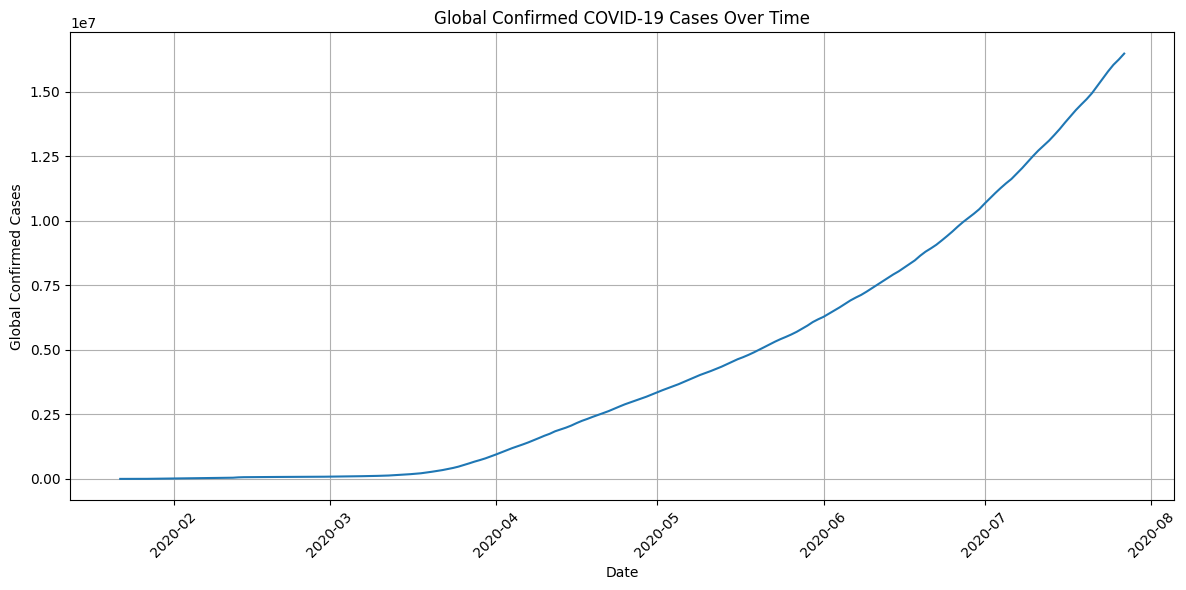

In [177]:
# put your answer here
import matplotlib.pyplot as plt
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

global_cases = df.groupby('Date')['Confirmed'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_cases['Date'], global_cases['Confirmed'])
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Global Confirmed Cases')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

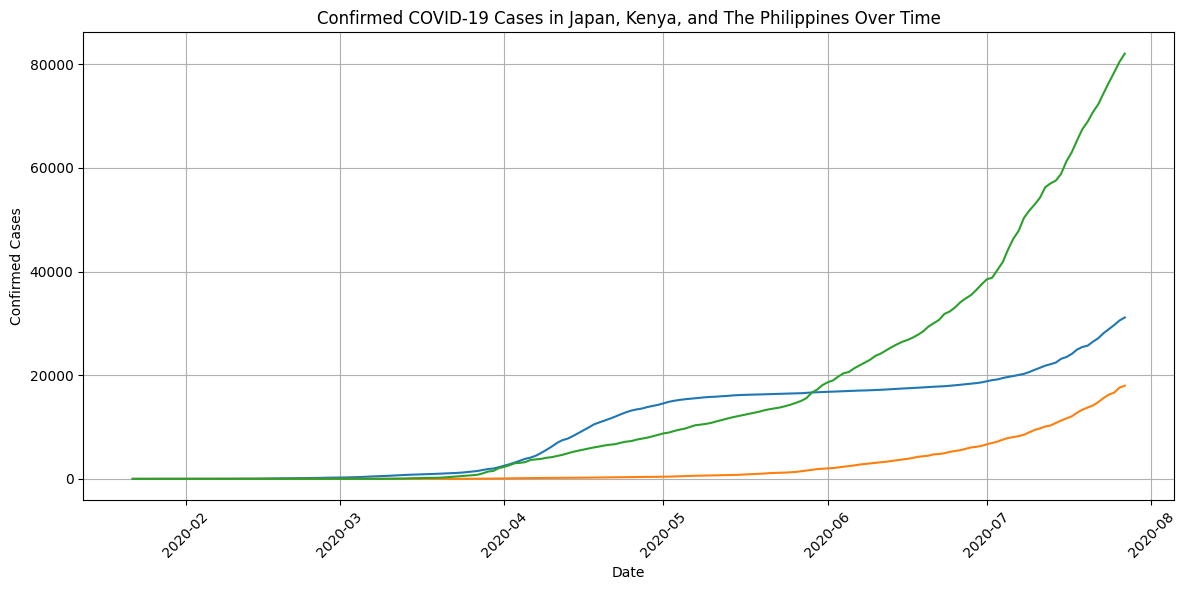

In [178]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter for Japan's data first
japan_cases = df.query("`Country/Region` == 'Japan'")
kenya_cases = df.query("`Country/Region` == 'Kenya'")
ph_cases = df.query("`Country/Region` == 'Philippines'")

# Aggregate confirmed cases by Date for Japan
japan_daily_cases = japan_cases.groupby('Date')['Confirmed'].sum().reset_index()
kenya_daily_cases = kenya_cases.groupby('Date')['Confirmed'].sum().reset_index()
ph_daily_cases = ph_cases.groupby('Date')['Confirmed'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(japan_daily_cases['Date'], japan_daily_cases['Confirmed'], kenya_daily_cases['Date'], kenya_daily_cases['Confirmed'], ph_daily_cases['Date'], ph_daily_cases['Confirmed'] )
plt.title('Confirmed COVID-19 Cases in Japan, Kenya, and The Philippines Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

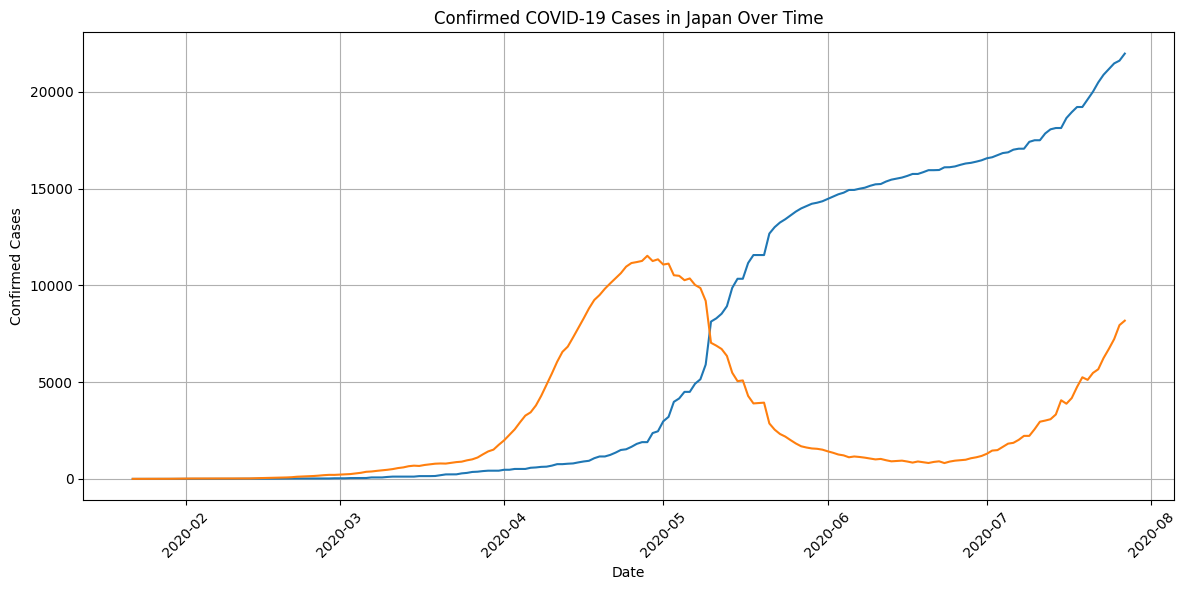

In [179]:
# put your answer here
df['Date'] = pd.to_datetime(df['Date'])

# Filter for Japan's data first
japan_cases = df.query("`Country/Region` == 'Japan'")

# Aggregate confirmed cases by Date for Japan
japan_recovered_cases = japan_cases.groupby('Date')['Recovered'].sum().reset_index()
japan_active_cases = japan_cases.groupby('Date')['Active'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(japan_recovered_cases['Date'], japan_recovered_cases['Recovered'], japan_active_cases['Date'], japan_active_cases['Active'])
plt.title('Confirmed COVID-19 Cases in Japan Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

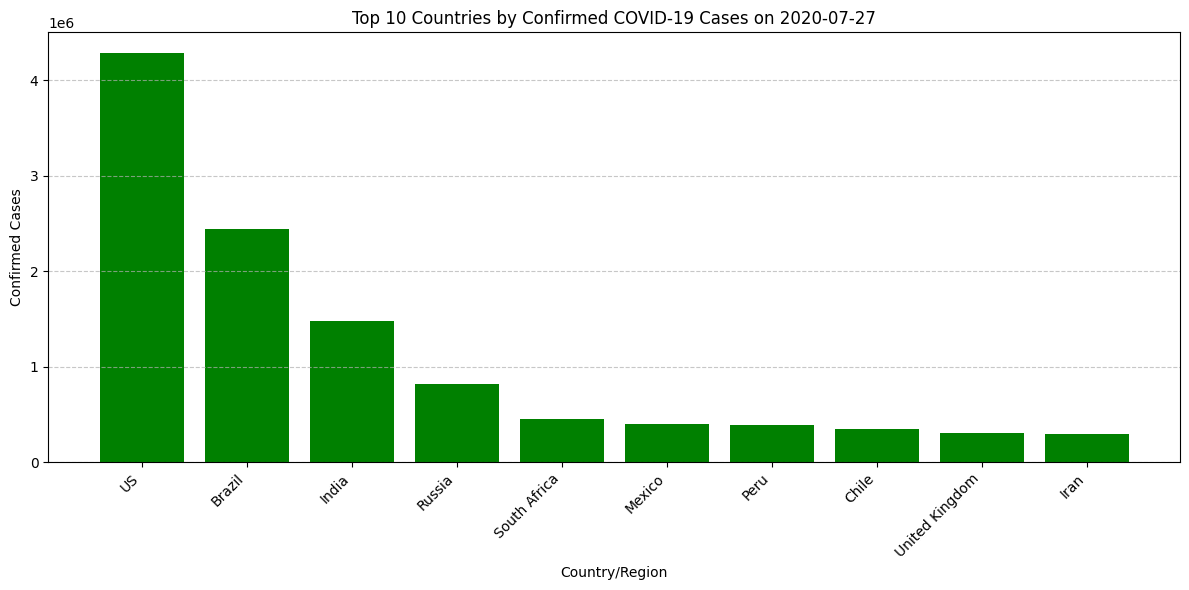

In [180]:
df['Date'] = pd.to_datetime(df['Date'])
latest_date = df['Date'].max()

country_summary_latest = df[df['Date'] == latest_date].groupby('Country/Region').sum(numeric_only=True).reset_index()

ALI_A_TOP10 = country_summary_latest.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(ALI_A_TOP10['Country/Region'], ALI_A_TOP10['Confirmed'], color='green')
plt.title(f'Top 10 Countries by Confirmed COVID-19 Cases on {latest_date.strftime("%Y-%m-%d")}')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability and align to the right
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

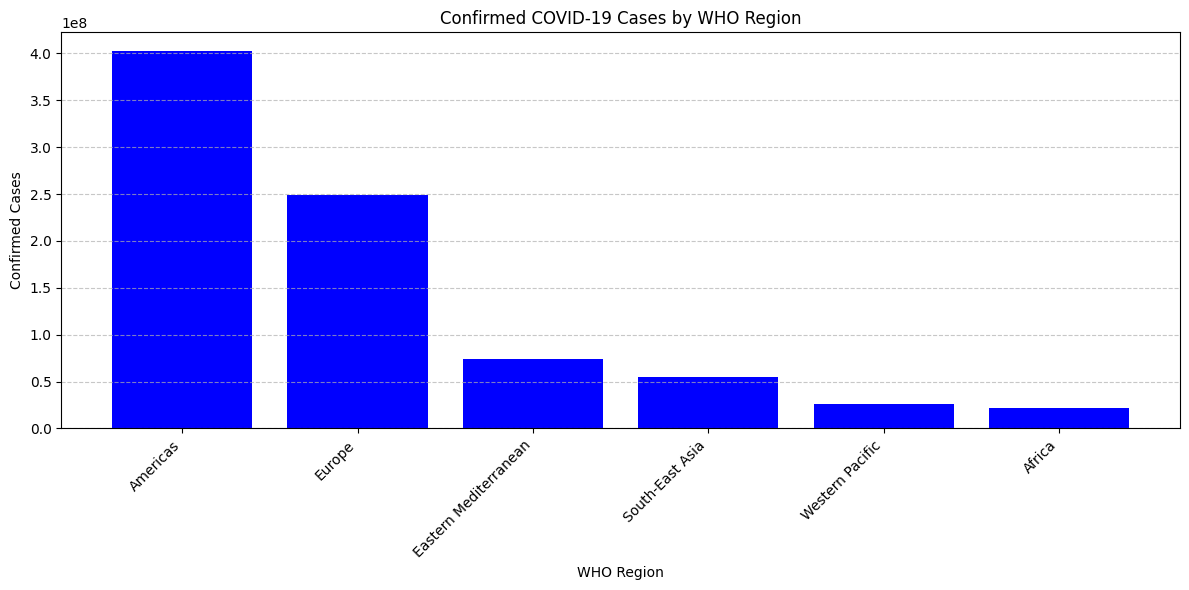

In [181]:
who_regions = df.groupby('WHO Region')['Confirmed'].sum().reset_index()
who_regions = who_regions.sort_values(by='Confirmed', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(who_regions['WHO Region'], who_regions['Confirmed'], color='blue')
plt.title('Confirmed COVID-19 Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability and align to the right
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [188]:
import plotly.express as px
df['Date'] = pd.to_datetime(df['Date'])

specific_date_str = '2020-07-27'
specific_date = pd.to_datetime(specific_date_str)
latest_date = df['Date'].max()

# Filter data for the specific date and aggregate confirmed cases by country
# We also need Lat and Long for geographic plotting, taking the mean as countries might have multiple entries
geo_df = df[df['Date'] == specific_date].groupby('Country/Region').agg(
    Lat=('Lat', 'mean'),
    Long=('Long', 'mean'),
    Confirmed=('Confirmed', 'sum')
).reset_index()

# Create the geographic scatter plot
fig = px.scatter_geo(
    geo_df,
    lat='Lat',
    lon='Long',
    size='Confirmed', # Size of marker based on confirmed cases
    color='Confirmed', # Color based on confirmed cases
    hover_name='Country/Region',
    projection='natural earth', # Map projection style
    title=f'Confirmed COVID-19 Cases Worldwide on {specific_date.strftime("%Y-%m-%d")}',
    color_continuous_scale=px.colors.sequential.Plasma # Choose a color scale
)

# Display the map
fig.show()

7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [186]:
import plotly.express as px
import pandas as pd

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get the latest date from the entire dataset (global latest date)
latest_date_global = df['Date'].max()

# Filter data for the latest global date
# Aggregate confirmed cases by country, taking mean for Lat/Long
# Include 'WHO Region' for coloring and hover information
geo_df_all_regions = df[df['Date'] == latest_date_global].groupby('Country/Region')[['Lat', 'Long', 'Confirmed', 'WHO Region']].agg({
    'Lat': 'mean',
    'Long': 'mean',
    'Confirmed': 'sum',
    'WHO Region': 'first'
}).reset_index()

# Create the geographic scatter plot for all regions
fig = px.scatter_geo(
    geo_df_all_regions,
    lat='Lat',
    lon='Long',
    size='Confirmed', # Size of marker based on confirmed cases
    color='WHO Region', # Color based on WHO Region to distinguish regions
    hover_name='Country/Region',
    hover_data={'WHO Region': True, 'Confirmed': ':,', 'Lat': False, 'Long': False}, # Add WHO Region to hover_data
    projection='natural earth', # Map projection style
    title=f'Confirmed COVID-19 Cases Worldwide by WHO Region on {latest_date_global.strftime("%Y-%m-%d")}',
    color_discrete_sequence=px.colors.qualitative.Alphabet # Choose a discrete color scale for regions
)

# Display the map
fig.show()